In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from IPython.display import display


class LeastSquaresSolution():
    def __init__(self, result_dict):
        self.result = result_dict
        self.df = self._make_df(self.result)
        
    def pprint(self):
        fields = ['input_data', 'x_squared', 'A', 'y', 'At.A', 'At.y', 'x*',
                  'c', 'b', 'a', 'equation', 'y*', 'squared_errors', 'residual']
        for field in fields:
            if field in self.result:
                print('{} \n'.format(field), self.result[field], end='\n\n')

    @staticmethod
    def _make_df(result):
        keys = ['x', 'y', 'y*', 'y_minus_y_approximation', 'squared_errors']
        df = pd.DataFrame([result[key] for key in keys if key in keys],
                          index=keys).transpose()
        df['y*'] = df['y*'].astype(float)
        df['squared_errors'] = df['squared_errors'].astype(float)
        df = df.rename(columns={'y_minus_y_approximation': 'y - y*'})
        return df
    
    def plot(self):
        return self.plot_(self.df)
        
    @staticmethod
    def plot_(df):
        display(df)
        
        sns.set_style('darkgrid')
        ax = df.plot.scatter('x', 'y', color='tomato', s=40)
        df.plot('x', 'y*', alpha=0.5, ax=ax)
        ax.set_xlim([min(df['x']) - 1, max(df['x']) + 1])
        ax.set_ylim([min(df['y']) - 1, max(df['y']) + 1])

        # Connect the original data points with their projections on the regression
        starts = df[['x', 'y']].apply(tuple, axis=1)
        ends = df[['x', 'y*']].apply(tuple, axis=1)
        coordinates = list(zip(starts, ends))
        lc = LineCollection(coordinates, colors='tomato', linewidth=1.5)
        ax.add_collection(lc)

        return ax


def solve_least_squares(x_vector, y_vector, verbose=True):
    """
    Expects a list of x values in *x_vector* and a list of y values in *y_vector*.
    """  
    x = np.array(x_vector)
    y = np.array(y_vector)
    
    A = np.vstack([np.ones(len(x)), x]).transpose()
    At_A = np.matmul(A.transpose(), A)
    At_y = np.dot(A.transpose(), y)
    
    b, a = np.linalg.solve(At_A, At_y)
    y_approximation = a * x + b
    y_minus_y_approximation = y - y_approximation
    y_minus_y_approximation_squared = np.power(y_minus_y_approximation, 2)
    residual = sum(y_minus_y_approximation_squared)

    result = {
        'input_data': np.array([x, y]),
        'x': x,
        'y': y,
        'A': A,
        'At.A': At_A,
        'At.y': At_y,
        'x*': np.array([b, a]),
        'b': b,
        'a': a,
        'equation': 'y* = {:.3f}x + {:.3f}'.format(a, b),
        'y*': ['{:.3f}'.format(n) for n in y_approximation],
        'y*_exact': y_approximation,
        'y_minus_y_approximation': y_minus_y_approximation,
        'squared_errors': ['{:.3f}'.format(n) for n in y_minus_y_approximation_squared],
        'residual': residual,
    }

    return LeastSquaresSolution(result)


def solve_least_squares_quadratic(x_vector, y_vector, verbose=True):
    x = np.array(x_vector)
    x_squared = x * x
    y = np.array(y_vector)
    
    A = np.vstack([np.ones(len(x)), x, x_squared]).transpose()
    At_A = np.matmul(A.transpose(), A)
    At_y = np.dot(A.transpose(), y)
    
    c, b, a = np.linalg.solve(At_A, At_y)
    y_approximation = a * x_squared + b * x + c
    y_minus_y_approximation = y - y_approximation
    y_minus_y_approximation_squared = np.power(y_minus_y_approximation, 2)
    residual = sum(y_minus_y_approximation_squared)

    result = {
        'input_data': np.array([x, y]),
        'x': x,
        'y': y,
        'x_squared': x_squared,
        'A': A,
        'At.A': At_A,
        'At.y': At_y,
        'x*': np.array([c, b, a]),
        'c': c,
        'b': b,
        'a': a,
        'equation': 'y* = {:.3f}x^2 + {:.3f}x + {:.3f}'.format(a, b, c),
        'y*': ['{:.3f}'.format(n) for n in y_approximation],
        'y_minus_y_approximation': y_minus_y_approximation,
        'squared_errors': ['{:.3f}'.format(n) for n in y_minus_y_approximation_squared],
        'residual': residual,
    }

    return LeastSquaresSolution(result)

input_data 
 [[ 0  1 -1  2]
 [ 1  3  2  4]]

A 
 [[ 1.  0.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  2.]]

y 
 [1 3 2 4]

At.A 
 [[ 4.  2.]
 [ 2.  6.]]

At.y 
 [ 10.   9.]

x* 
 [ 2.1  0.8]

b 
 2.1

a 
 0.8

equation 
 y* = 0.800x + 2.100

y* 
 ['2.100', '2.900', '1.300', '3.700']

squared_errors 
 ['1.210', '0.010', '0.490', '0.090']

residual 
 1.8



,x,y,y*,y - y*,squared_errors
0,0,1,2.1,-1.1,1.21
1,1,3,2.9,0.1,0.01
2,-1,2,1.3,0.7,0.49
3,2,4,3.7,0.3,0.09


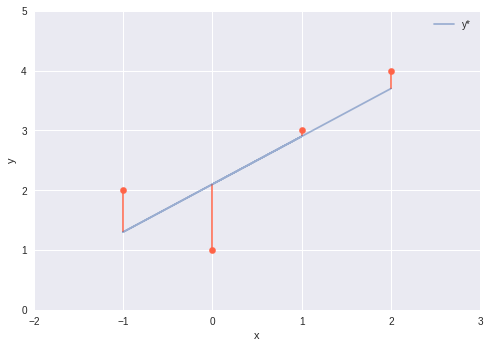

In [2]:
# P3.13

x = [0, 1, -1, 2]
y = [1, 3, 2, 4]

result = solve_least_squares(x, y)
result.pprint()
ax = result.plot()

input_data 
 [[ 6.   4.   8.   5.   3.5]
 [ 6.5  4.5  7.   5.   4. ]]

A 
 [[ 1.   6. ]
 [ 1.   4. ]
 [ 1.   8. ]
 [ 1.   5. ]
 [ 1.   3.5]]

y 
 [ 6.5  4.5  7.   5.   4. ]

At.A 
 [[   5.     26.5 ]
 [  26.5   153.25]]

At.y 
 [  27.  152.]

x* 
 [ 1.71484375  0.6953125 ]

b 
 1.71484375

a 
 0.6953125

equation 
 y* = 0.695x + 1.715

y* 
 ['5.887', '4.496', '7.277', '5.191', '4.148']

squared_errors 
 ['0.376', '0.000', '0.077', '0.037', '0.022']

residual 
 0.51171875



,x,y,y*,y - y*,squared_errors
0,6,6.5,5.887,0.613281,0.376
1,4,4.5,4.496,0.00390625,0.000
2,8,7,7.277,-0.277344,0.077
3,5,5,5.191,-0.191406,0.037
4,3.5,4,4.148,-0.148438,0.022


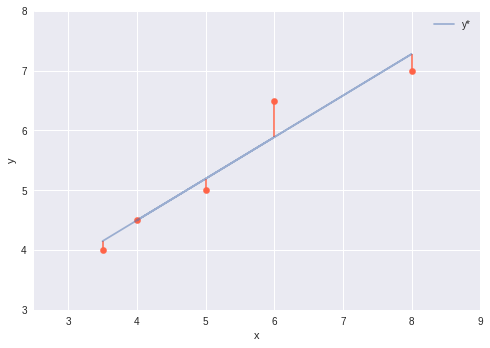

In [3]:
# P3.14

x = [6, 4, 8, 5, 3.5]
y = [6.5, 4.5, 7, 5, 4]

result = solve_least_squares(x, y)
result.pprint()
result.plot()

input_data 
 [[ 79.    69.    70.    81.    63.    73.  ]
 [  1.83   1.73   1.68   1.88   1.63   1.78]]

A 
 [[  1.  79.]
 [  1.  69.]
 [  1.  70.]
 [  1.  81.]
 [  1.  63.]
 [  1.  73.]]

y 
 [ 1.83  1.73  1.68  1.88  1.63  1.78]

At.A 
 [[  6.00000000e+00   4.35000000e+02]
 [  4.35000000e+02   3.17610000e+04]]

At.y 
 [  10.53  766.45]

x* 
 [ 0.77373602  0.01353468]

b 
 0.773736017897

a 
 0.0135346756152

equation 
 y* = 0.014x + 0.774

y* 
 ['1.843', '1.708', '1.721', '1.870', '1.626', '1.762']

squared_errors 
 ['0.000', '0.001', '0.002', '0.000', '0.000', '0.000']

residual 
 0.00280760626398



,x,y,y*,y - y*,squared_errors
0,79,1.83,1.843,-0.0129754,0.000
1,69,1.73,1.708,0.0223714,0.001
2,70,1.68,1.721,-0.0411633,0.002
3,81,1.88,1.870,0.00995526,0.000
4,63,1.63,1.626,0.00357942,0.000
5,73,1.78,1.762,0.0182327,0.000


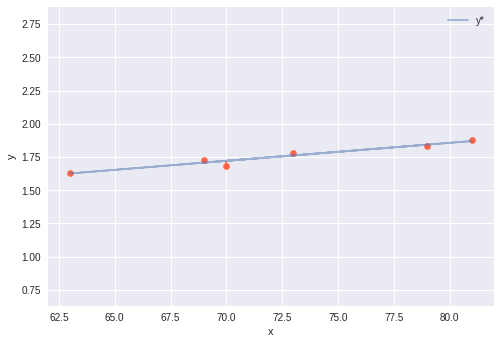

In [4]:
# P3.15

x = [79, 69, 70, 81, 63, 73]
y = [1.83, 1.73, 1.68, 1.88, 1.63, 1.78]

result = solve_least_squares(x, y)
result.pprint()
result.plot()

input_data 
 [[ 1.   2.   3.   4.   5.   6.   7.   8.   9. ]
 [ 2.1  3.3  3.9  4.4  4.6  4.8  4.6  4.2  3.4]]

x_squared 
 [ 1  4  9 16 25 36 49 64 81]

A 
 [[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]]

y 
 [ 2.1  3.3  3.9  4.4  4.6  4.8  4.6  4.2  3.4]

At.A 
 [[  9.00000000e+00   4.50000000e+01   2.85000000e+02]
 [  4.50000000e+01   2.85000000e+02   2.02500000e+03]
 [  2.85000000e+02   2.02500000e+03   1.53330000e+04]]

At.y 
 [   35.3   186.2  1178.2]

x* 
 [ 0.93333333  1.35106061 -0.11893939]

c 
 0.933333333333

b 
 1.35106060606

a 
 -0.118939393939

equation 
 y* = -0.119x^2 + 1.351x + 0.933

y* 
 ['2.165', '3.160', '3.916', '4.435', '4.715', '4.758', '4.563', '4.130', '3.459']

squared_errors 
 ['0.004', '0.020', '0.000', '0.001', '0.013', '0.002', '0.001', '0.005', '0.003']

residual 
 0.0502424242424



,x,y,y*,y - y*,squared_errors
0,1,2.1,2.165,-0.0654545,0.004
1,2,3.3,3.160,0.140303,0.020
2,3,3.9,3.916,-0.0160606,0.000
3,4,4.4,4.435,-0.0345455,0.001
4,5,4.6,4.715,-0.115152,0.013
5,6,4.8,4.758,0.0421212,0.002
6,7,4.6,4.563,0.0372727,0.001
7,8,4.2,4.130,0.070303,0.005
8,9,3.4,3.459,-0.0587879,0.003


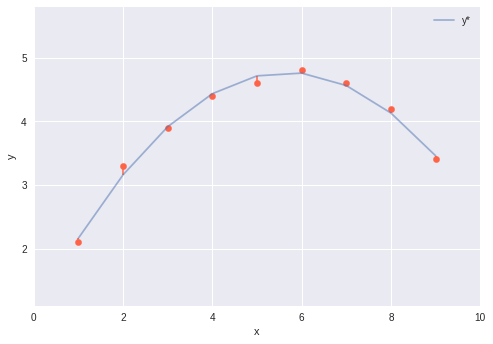

In [5]:
# P3.16

x = list(range(1, 10))
y = [2.1, 3.3, 3.9, 4.4, 4.6, 4.8, 4.6, 4.2, 3.4]

result = solve_least_squares_quadratic(x, y)
result.pprint()
ax = result.plot()

linear solution


,x,y,y*,y - y*,squared_errors
0,0,0.6,0.42,0.18,0.032
1,1,0.5,0.74,-0.24,0.058
2,2,1,1.06,-0.06,0.004
3,3,1.5,1.38,0.12,0.014


quadratic solution


,x,y,y*,y - y*,squared_errors
0,0,0.6,0.57,0.03,0.001
1,1,0.5,0.59,-0.09,0.008
2,2,1,0.91,0.09,0.008
3,3,1.5,1.53,-0.03,0.001


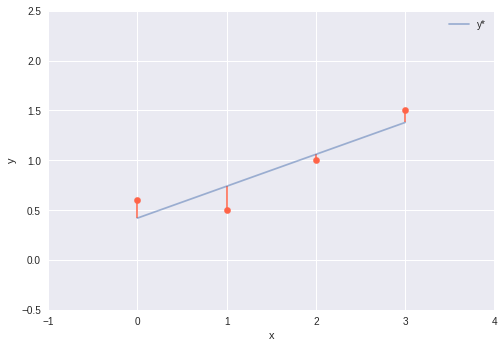

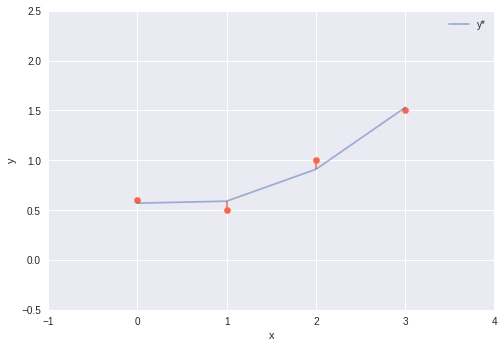

In [6]:
# P3.17

x = [0, 1, 2, 3]
y = [0.6, 0.5, 1, 1.5]

print('linear solution')
linear_sol = solve_least_squares(x, y)
linear_sol.plot()

print('quadratic solution')
quadr_sol = solve_least_squares_quadratic(x, y)
quadr_sol.plot()

,ax+b,x,y,y*
0,1.666667,0,0.6,0.518135
1,4.000000,1,0.5,0.566572
2,5.000000,2,1.0,0.974659
3,6.666667,3,1.5,1.485884


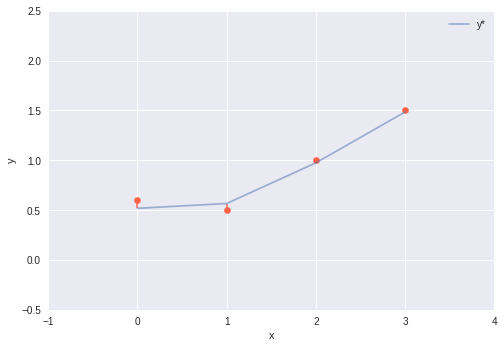

In [7]:
result = pd.DataFrame({
    'x': x,
    'y': y,
    'ax+b': [5/3, 12/3, 15/3, 20/3]
})

def model(x):
    return (x**2 + 1) / (1.6 * x + 1.93)

result['y*'] = result['x'].apply(model)

LeastSquaresSolution.plot_(result)

,x,y,y*
0,0,2,1.954237
1,1,3,3.254374
2,2,6,5.419481
3,3,9,9.025013
4,4,15,15.029276


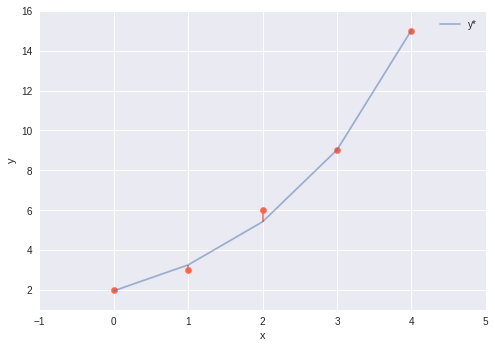

In [8]:
# P3.18

from math import log
from math import e

x = list(range(5))
y = [2, 3, 6, 9, 15]
ln_y = [log(n) for n in y]

result = solve_least_squares(x, ln_y)

def model(x):
    k = e ** 0.67
    a = e ** 0.51
    return k * (a ** x)

y_approximation = [model(n) for n in x]

df = pd.DataFrame({
    'x': x,
    'y': y,
    'y*': y_approximation,
})

LeastSquaresSolution.plot_(df)

input_data 
 [[  1.97000000e+03   1.98000000e+03   1.99000000e+03   1.99500000e+03
    2.00000000e+03   2.00500000e+03   2.01000000e+03   2.01500000e+03]
 [  1.28200000e+00   1.67400000e+00   2.00300000e+00   2.20100000e+00
    2.29900000e+00   2.41000000e+00   2.58500000e+00   2.70000000e+00]]

A 
 [[  1.00000000e+00   1.97000000e+03]
 [  1.00000000e+00   1.98000000e+03]
 [  1.00000000e+00   1.99000000e+03]
 [  1.00000000e+00   1.99500000e+03]
 [  1.00000000e+00   2.00000000e+03]
 [  1.00000000e+00   2.00500000e+03]
 [  1.00000000e+00   2.01000000e+03]
 [  1.00000000e+00   2.01500000e+03]]

y 
 [ 1.282  1.674  2.003  2.201  2.299  2.41   2.585  2.7  ]

At.A 
 [[  8.00000000e+00   1.59650000e+04]
 [  1.59650000e+04   3.18617750e+07]]

At.y 
 [  1.71540000e+01   3.42834250e+04]

x* 
 [ -5.99608304e+01   3.11206166e-02]

b 
 -59.9608304432

a 
 0.0311206165703

equation 
 y* = 0.031x + -59.961

y* 
 ['1.347', '1.658', '1.969', '2.125', '2.280', '2.436', '2.592', '2.747']

squared_errors 

,x,y,y*,y - y*,squared_errors
0,1970,1.282,1.347,-0.0647842,0.004
1,1980,1.674,1.658,0.0160096,0.000
2,1990,2.003,1.969,0.0338035,0.001
3,1995,2.201,2.125,0.0762004,0.006
4,2000,2.299,2.280,0.0185973,0.000
5,2005,2.41,2.436,-0.0260058,0.001
6,2010,2.585,2.592,-0.00660886,0.000
7,2015,2.7,2.747,-0.0472119,0.002


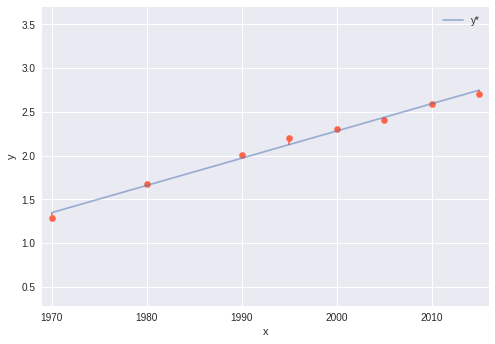

In [9]:
# Entrega de cuadrados mínimos

x = [1970, 1980, 1990, 1995, 2000, 2005, 2010, 2015]
y = [1.282, 1.674, 2.003, 2.201, 2.299, 2.410, 2.585, 2.7]

result = solve_least_squares(x, y)
result.pprint()
result.plot()

In [15]:
# Entrega. Punto b.

t = [1970, 1980, 1990, 1995, 2000, 2005, 2010, 2015]
y = [1.282, 1.674, 2.003, 2.201, 2.299, 2.410, 2.585, 2.7]
ln_y = [log(n) for n in y]
ln_t = [log(n) for n in t]

y_tilda = ln_y
t_tilda = ln_t

result = solve_least_squares(t_tilda, y_tilda)
result.pprint()



input_data 
 [[ 7.58578882  7.59085212  7.59588992  7.59839933  7.60090246  7.60339934
   7.60589     7.60837447]
 [ 0.24842136  0.51521597  0.69464606  0.7889118   0.83247425  0.87962675
   0.94972551  0.99325177]]

A 
 [[ 1.          7.58578882]
 [ 1.          7.59085212]
 [ 1.          7.59588992]
 [ 1.          7.59839933]
 [ 1.          7.60090246]
 [ 1.          7.60339934]
 [ 1.          7.60589   ]
 [ 1.          7.60837447]]

y 
 [ 0.24842136  0.51521597  0.69464606  0.7889118   0.83247425  0.87962675
  0.94972551  0.99325177]

At.A 
 [[   8.           60.78949647]
 [  60.78949647  461.92076859]]

At.y 
 [  5.90227346  44.86257026]

x* 
 [-241.84902281   31.9248319 ]

b 
 -241.849022807

a 
 31.9248318987

equation 
 y* = 31.925x + -241.849

y* 
 ['0.326', '0.488', '0.648', '0.729', '0.809', '0.888', '0.968', '1.047']

squared_errors 
 ['0.006', '0.001', '0.002', '0.004', '0.001', '0.000', '0.000', '0.003']

residual 
 0.0164152417419



In [25]:
from fractions import Fraction
from numpy.linalg import det

ex_1 = [
    [[1, 2],
     [3, -4]],
    [[6, 5],
     [3/5, 1/2]],
    [[-2, 3, 1],
     [4, 6, 5],
     [0, 2, 1]],
    [[-2, 1, 1],
     [4, -2, 4],
     [2, -1, 5]]
]

for matrix in ex_1:
    display(matrix)
    determinant = np.around(det(matrix), decimals=5) # Deals with annoying small rounding errors
    determinant = int(determinant) if determinant.is_integer() else determinant
    print("det = {}".format(rounded_det))


[[1, 2], [3, -4]]

det = 0


[[6, 5], [0.6, 0.5]]

det = 0


[[-2, 3, 1], [4, 6, 5], [0, 2, 1]]

det = 0


[[-2, 1, 1], [4, -2, 4], [2, -1, 5]]

det = 0


In [11]:
%matplotlib inline

from scipy import linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rows = [
    [1, 3, 3, 1],
    [2, 6, 9, 5],
    [-1, -3, 3, 5]
]

Ab = np.matrix(rows)
A = Ab[:,:3]
b = Ab[:, 3]
Ab

matrix([[ 1,  3,  3,  1],
        [ 2,  6,  9,  5],
        [-1, -3,  3,  5]])

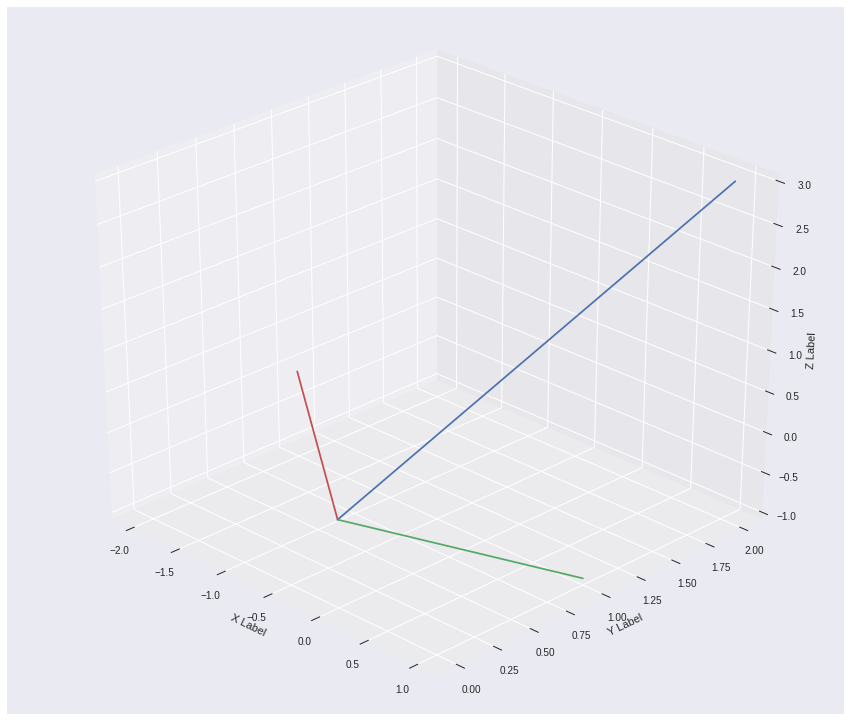

<function __main__.draw>

In [12]:
from ipywidgets import interact

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def compute_z(x, y):
    return - (1/3) * x - (2/3) * y

def plot_vector(ax, x, y, z):
    ax.plot(xs=[0, x], ys=[0, y], zs=[0, z])

def draw(elevation=30, angle=45):
    fig = plt.figure(figsize=(15, 13))
    ax = fig.add_subplot(111, projection='3d')
#     x = y = np.arange(-3.0, 3.0, 0.05)
#     X, Y = np.meshgrid(x, y)
#     zs = np.array([compute_z(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
#     Z = zs.reshape(X.shape)
#     ax.plot_surface(X, Y, Z)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.view_init(elevation, 360 - angle)
    plot_vector(ax, 1, 2, 3)
    plot_vector(ax, 1, 1, -1)
    plot_vector(ax, -2, 1, 0)
    
    plt.show()
    
interact(draw, elevation=(0, 100, 10), angle=(0, 360, 10))